In [1]:
import scipy.sparse
import csv
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt

In [39]:
def getdata(path):
    with open(path,'r', encoding='UTF-8', newline='') as f:
        reader = csv.reader(f)
        dicts = list(reader)
    return dicts

def buildingmatrix(data):# We build adjacency matrix as well as the Laplacian matrix based on the data
    col1 = []
    col2 = []
    for i in range(0, len(data)):
        col1.append(int(data[i][0]))
        col2.append(int(data[i][1]))
    
    # Build adjacency matrix
    max_ids = max(max(col1,col2))
    admatri = np.zeros((max_ids,max_ids))
    for i in range(0,len(col1)):
        admatri[col1[i]-1][col2[i]-1] = 1
    
    # Build Laplacian matrix
    Lapmatri = admatri
    for i in range(0,max_ids):
        for j in range(0,max_ids):
            if admatri[i][j] == 1 and i!=j:
                Lapmatri[i][i] += 1
                Lapmatri[i][j] = -1
    
    return Lapmatri

def fiedlervector(Lapmatrix):# We write it to find the fiedler vector
    w,v=eig(Lapmatrix)#w is the eigenvalues while v is the eigen vectors
    s = set(w)
    k = sorted(s)[1]
    #print ('The eigenvalue of Fiedler Vector is:',k)
    for i in range(0,len(Lapmatrix)):
        if w[i] == k:
            #print('The localtion of Fiedler Vector is:', i)
            break
    fv = v[:,i]

    return fv

def main(data):
    data = getdata(data)
    m = buildingmatrix(data)
    fv = fiedlervector(m)
    
    # Visualize the clustering distribution of points
    data = sorted(fv)
    newdata = np.squeeze(data)
    plt.plot(newdata)
    plt.show()

In [40]:
def clustering(data,a,b):
    data = getdata(data)
    m = buildingmatrix(data)
    fv = fiedlervector(m)
    
    cluster1 = []
    cluster2 = []
    for i in range(len(fv)):
        if fv[i] <= a:
            cluster1.append(i)
        elif fv[i] >= b:
            cluster2.append(i)
    
    return cluster1,cluster2

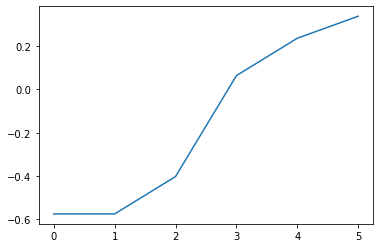

cluster1:[3, 4, 5], cluster2:[0, 1, 2]


In [41]:
main('test.txt')
classify = clustering('test.txt',-0.14,-0.01)
print('cluster1:{}, cluster2:{}'.format(classify[0],classify[1]))

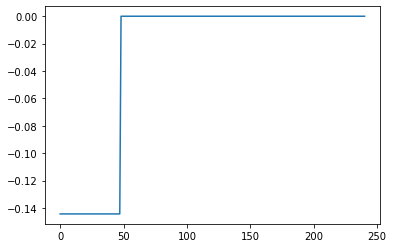

cluster1:[117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164], cluster2:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,

In [42]:
main('example1.dat')
classify = clustering('example1.dat',-0.14,-0.01)
print('cluster1:{}, cluster2:{}'.format(classify[0],classify[1]))

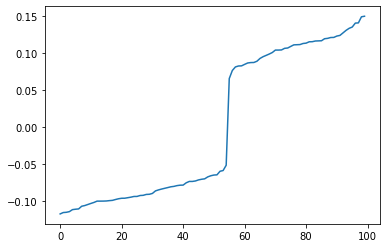

cluster1:[0, 1, 3, 4, 7, 8, 9, 11, 12, 14, 17, 18, 19, 20, 22, 23, 24, 25, 26, 28, 30, 35, 36, 38, 42, 43, 47, 48, 49, 51, 52, 55, 56, 58, 60, 62, 63, 64, 65, 66, 70, 72, 74, 78, 81, 82, 83, 84, 86, 87, 89, 92, 93, 94, 96], cluster2:[2, 5, 10, 13, 15, 16, 21, 27, 29, 31, 32, 33, 34, 37, 39, 40, 41, 44, 45, 46, 50, 53, 54, 57, 59, 61, 67, 68, 69, 71, 73, 75, 76, 77, 79, 80, 85, 88, 90, 91, 95, 97, 98, 99]


In [43]:
main('example2.dat')
classify = clustering('example2.dat',-0.05,0.07)
print('cluster1:{}, cluster2:{}'.format(classify[0],classify[1]))